In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import cv2

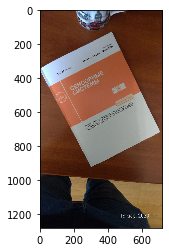

In [2]:
image = cv2.imread('Data/test1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
def rgb2gray(rgb):
    gray = np.mean(rgb, axis=2)
    return gray.T

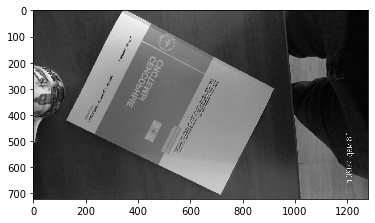

In [4]:
gray = rgb2gray(image)
plt.imshow(gray,cmap='gray')

In [5]:
from scipy.ndimage import rotate

In [6]:
def discrete_radon_transform(img, steps):
    # crate matrix
    w, h = img.shape
    zero = np.zeros((h, steps), dtype='float64')
    # sum and roatate
    for s in range(steps):
        rotation = rotate(img, s, reshape=False).astype('float64')
    # sum
        zero[:, s] = np.sum(rotation, axis=0)
    # rotate image
    zero = rotate(zero, 180, reshape=False).astype('float64')
    return zero

In [7]:
radon = discrete_radon_transform(gray, 180)

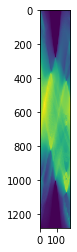

In [8]:
plt.imshow(radon)

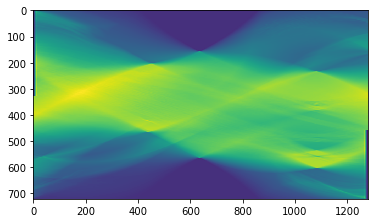

In [9]:
res = cv2.resize(radon.T, dsize=(gray.shape), interpolation=cv2.INTER_CUBIC)
plt.imshow(res.T)

### Точка схода

In [10]:
i,j = np.unravel_index(res.argmax(), res.shape)
print(i, j)

181 315


# Radon rotate

In [11]:
h, w = gray.shape
gray = gray - np.mean(gray)  # сделать яркость выше и ниже нуля
# radon transform
sinogram = discrete_radon_transform(gray, 180)

In [20]:
# Найти среднеквадратическое значение для каждой строки и найти наиболее загруженное вращение
r = np.array([np.sqrt(np.mean(np.abs(line) ** 2)) for line in sinogram.T])
rotation = np.argmax(r)
print(f'Rotation: {rotation} degrees')

Rotation: 5 degrees


In [21]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

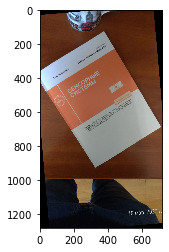

In [22]:
plt.imshow(rotate(image, rotation))

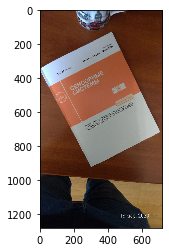

In [23]:
plt.imshow(image)

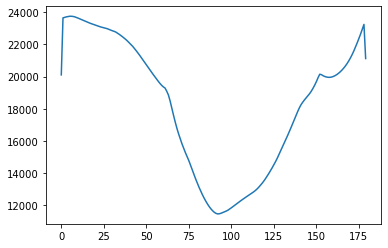

In [24]:
plt.plot(r)